In [102]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

In [141]:
import pandas as pd
import simplejson as json
from simplejson import JSONDecodeError

with open('../results/run11/driver.json') as fh:
    json_data = [json.loads(row) for row in fh]
df = pd.DataFrame(json_data).rename(columns={'command': 'program'})
df['n'] = df['n'].astype('int')

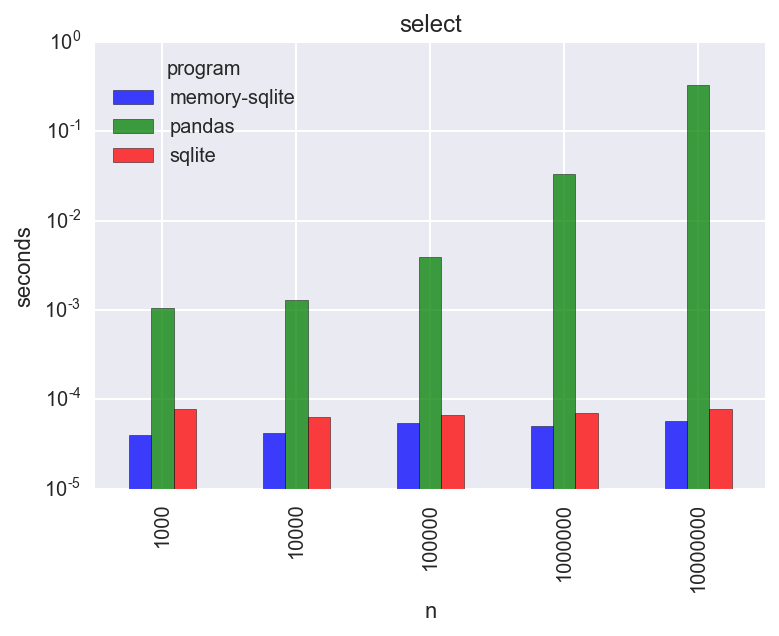

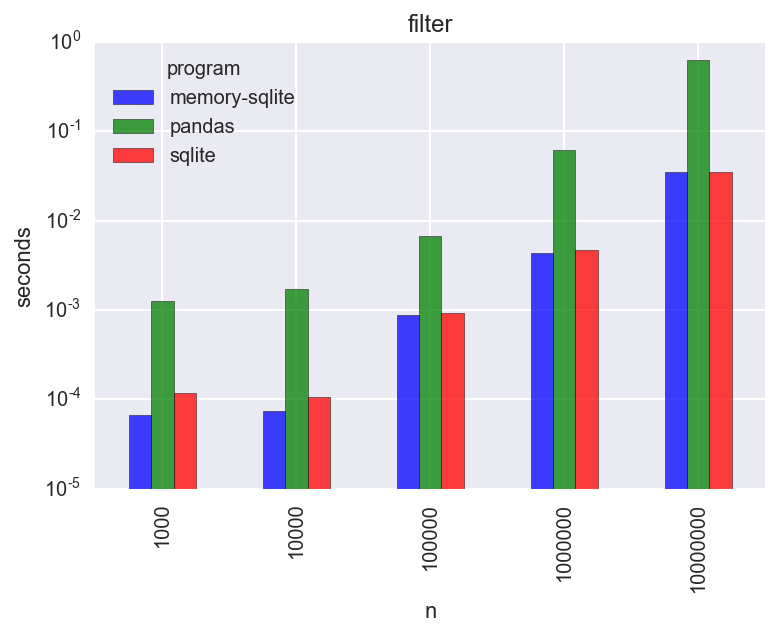

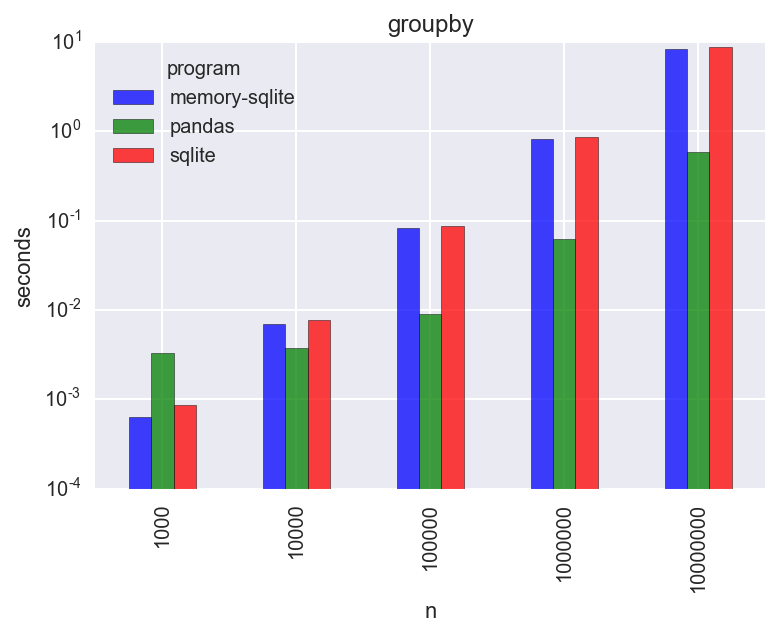

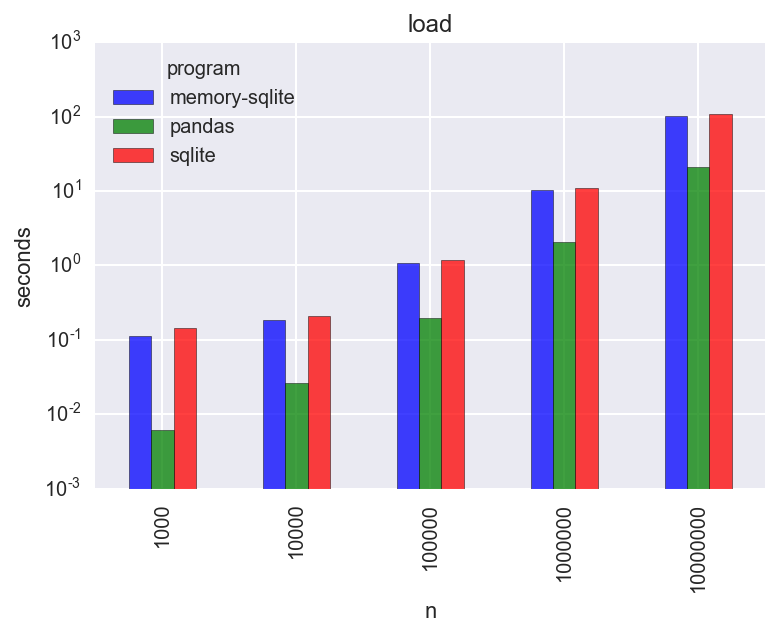

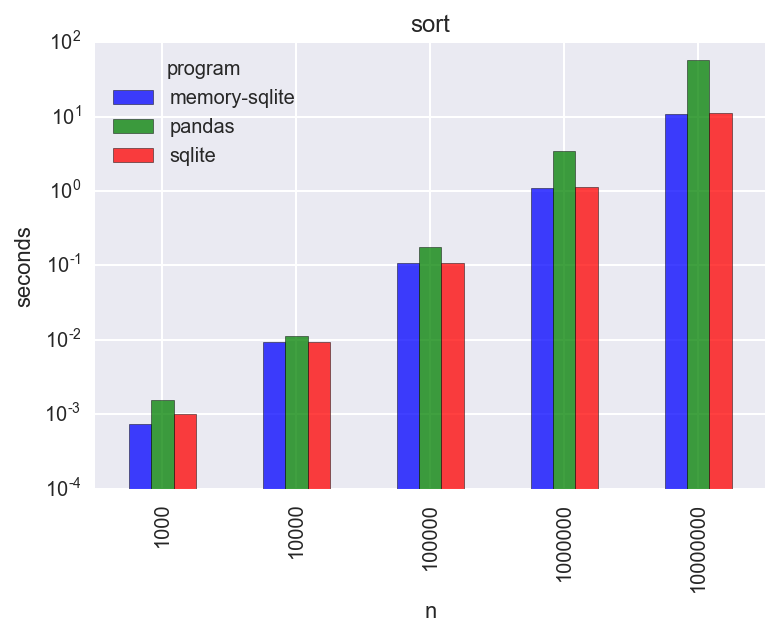

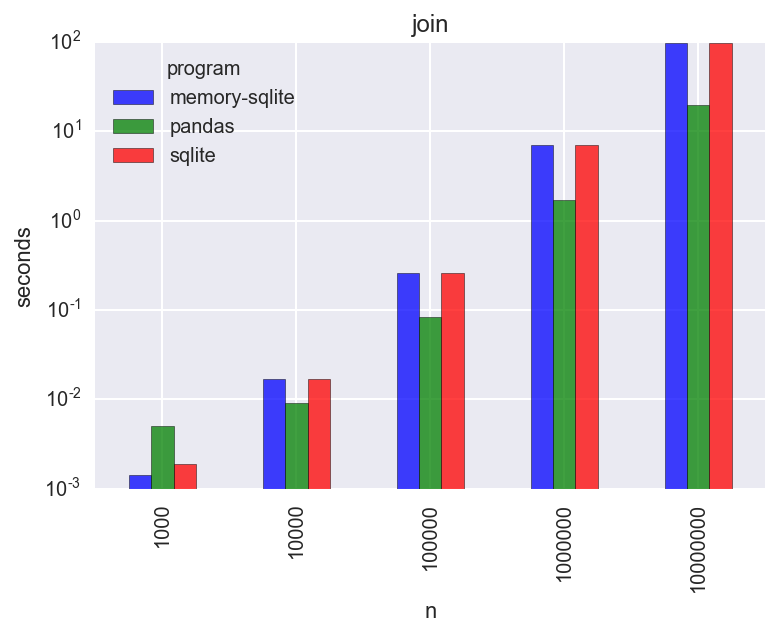

In [164]:
for task in  ['select', 'filter','groupby', 'load', 'sort', 'join']:
    group = df.groupby(['n', 'program'])[task]
    m = group.mean().unstack()
    e = group.std().unstack()
    ax = m.plot(kind='bar', logy=True, title=task, alpha=.75)
    ax.set_ylabel("seconds")

## Loading data in sqlite shell

There is no significant speedup from loading sqlite in its own shell vs. via pandas

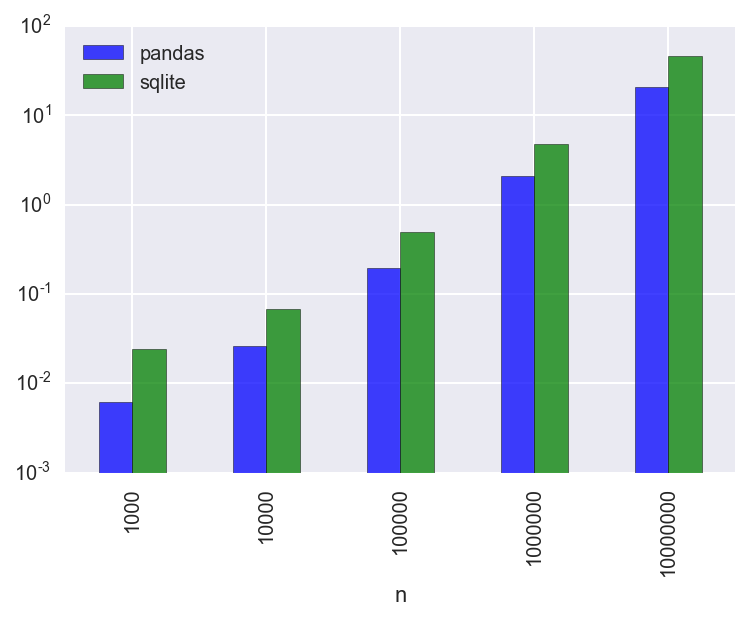

In [163]:
sqlite_load = pd.Series({
    1000: 0.024,
    10000: 0.068,
    100000: 0.499,
    1000000: 4.740,
    10000000: 46.121,
})

pandas_load = df.groupby(['program', 'n'])['load'].mean().loc['pandas']

pd.DataFrame({
    'sqlite': sqlite_load,
    'pandas': pandas_load
}).plot(kind='bar', alpha=.75, logy=True)

program  memory-sqlite    pandas     sqlite
groupby       0.813791  0.063251   0.859696
load         10.178923  2.077475  10.910871
program  memory-sqlite    pandas    sqlite
select         0.00005  0.033023  0.000071
filter         0.00437  0.062210  0.004649


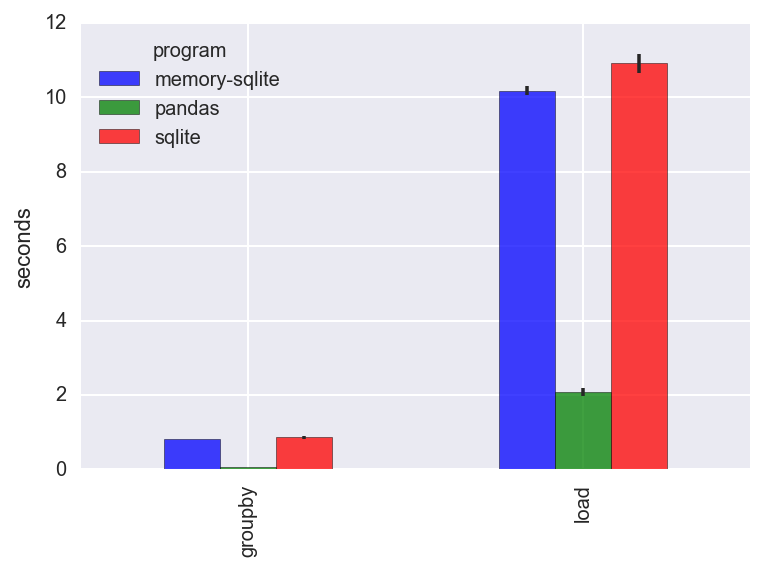

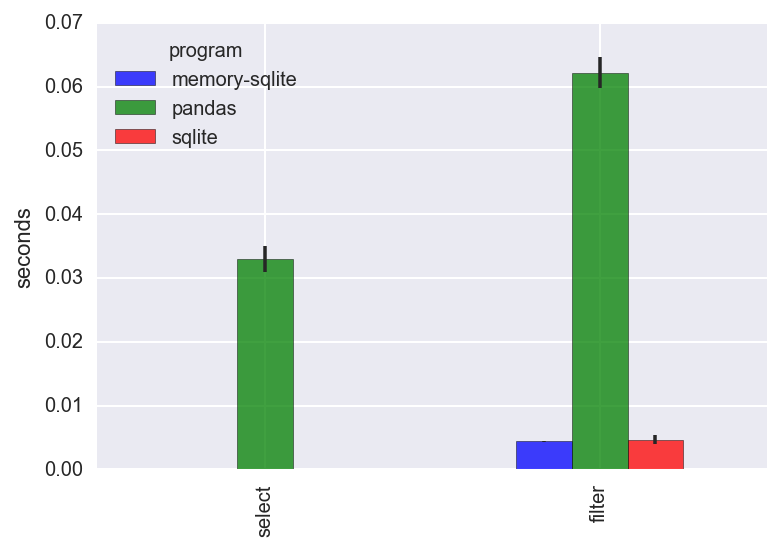

In [145]:
def graph(df, labels, n):
    group = df.groupby(['n', 'program'])[labels]
    m = group.mean().loc[n].T
    s = group.std().loc[n].T
    ax = m.plot(kind='bar', yerr=s, alpha=0.75)
    ax.set_ylabel("seconds")
    print m
    
graph(df, ['groupby', 'load'], 1000000)
graph(df, ['select', 'filter'], 1000000)